# edas 003 - lab 1 - python

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import style
style.use('dark_background')

data = pd.read_csv("./ArquivosLaboratorio/Arquivo_Treino.csv", delimiter=';')
data.describe()
data.count()

In [ ]:
data.head(10)

In [ ]:

credit_approved = data["Loan_Status"].value_counts().plot(kind='bar', title='Frequencia - Crédito Aprovado / Negado')

In [ ]:
credit_approved = data["Loan_Status"] == "Y" 
data[credit_approved].describe()

In [ ]:
data['ApplicantIncome'].hist(bins=50, figsize=(6,6))

In [ ]:
data.boxplot(column='ApplicantIncome', figsize=(8,8))

In [ ]:
data.boxplot(column='ApplicantIncome', figsize=(7,7), by='Education')

In [ ]:
data['LoanAmount'].hist(bins=50, figsize=(8,8))

In [ ]:
temp1 = data['Credit_History'].value_counts(ascending=True)
temp2 = data.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print('Frequency Table for Credit History:')
print(temp1)
print(temp1[0])
print(temp1[1])
print(temp1.index[0])

print('\nProbability of getting loan for each Credit History class:')
print(temp2)

In [ ]:


from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1)

ax1.set_xlabel('Histórico de Crédito')
ax1.set_ylabel('Contagem de Clientes')
ax1.set_title('Clientes por Histórico')

temp2.plot(kind='bar', ax=ax1)

ax2.set_xlabel('Histórico de Crédito')
ax2.set_ylabel('Probabilidade de Empréstimo')
ax2.set_title('Probabilidade de Empréstimo por Histórico')

temp2.plot(kind='bar', ax=ax2)

<AxesSubplot:xlabel='Credit_History'>

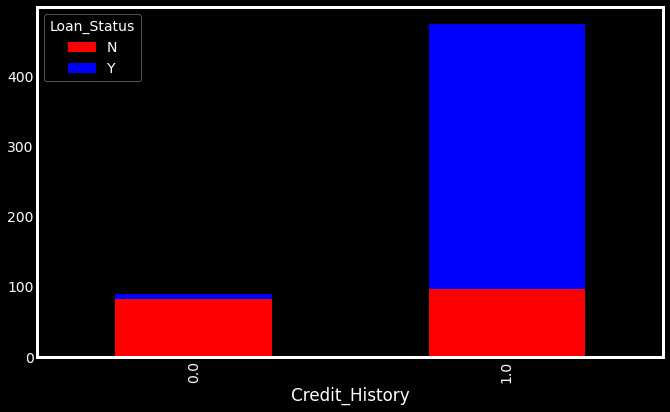

In [34]:
temp3 = pd.crosstab(data['Credit_History'],
data['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'],
grid=False)

<AxesSubplot:xlabel='Credit_History,Gender'>

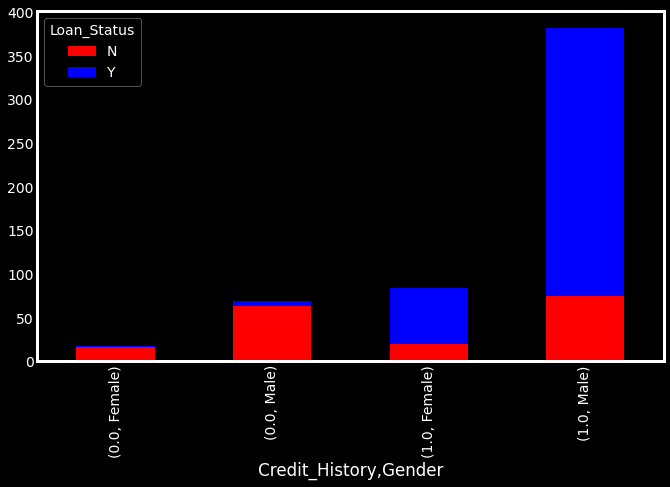

In [35]:
temp3 = pd.pivot_table(data, index=['Credit_History','Gender'], columns='Loan_Status', aggfunc='count')
temp3['Loan_ID'].plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)

In [37]:
data.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

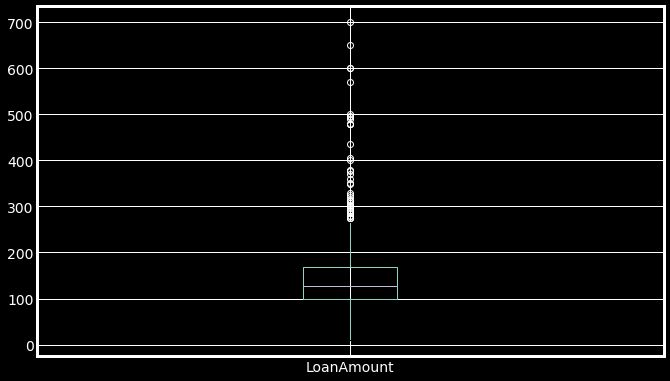

In [38]:
data.boxplot(column='LoanAmount')

<AxesSubplot:title={'center':'LoanAmount'}, xlabel='[Education, Self_Employed]'>

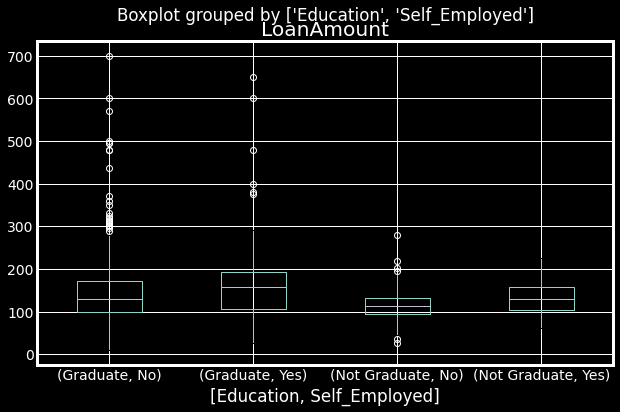

In [39]:
data.boxplot(column='LoanAmount', by=['Education','Self_Employed'])

In [40]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [42]:
table = data.pivot_table(values='LoanAmount', index='Self_Employed', columns='Education', aggfunc=np.median)
table

Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,113.0
Yes,157.5,130.0


In [46]:
data['Self_Employed'].fillna('No',inplace=True)


In [47]:
# Define a função que retorna o valor da tabela pivot
def fage(x):
 return table.loc[x['Self_Employed'], x['Education']] 

data['LoanAmount'].fillna(data[data['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)



In [49]:
data.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

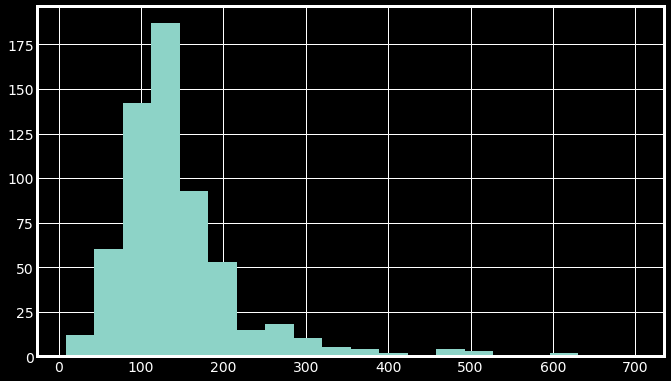

In [50]:
data['LoanAmount'].hist(bins=20)


<AxesSubplot:>

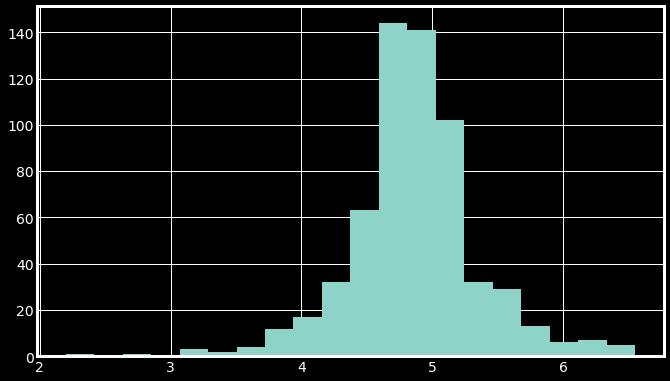

In [55]:
data['LoanAmount_log'] = np.log(data['LoanAmount'])
data['LoanAmount_log'].hist(bins=20)

<AxesSubplot:>

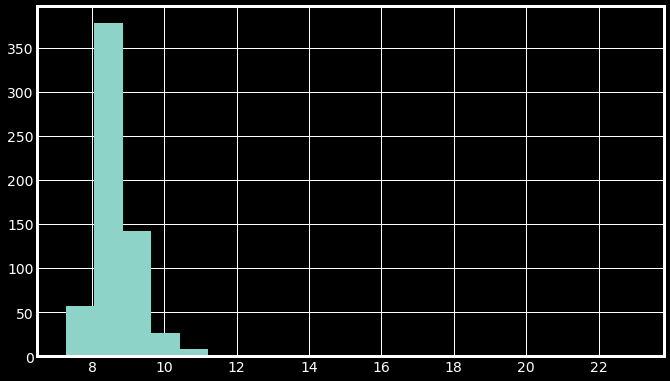

In [58]:
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data['TotalIncome_log'] = np.log(data['TotalIncome'])
data['TotalIncome_log'].hist(bins=20)


<AxesSubplot:>

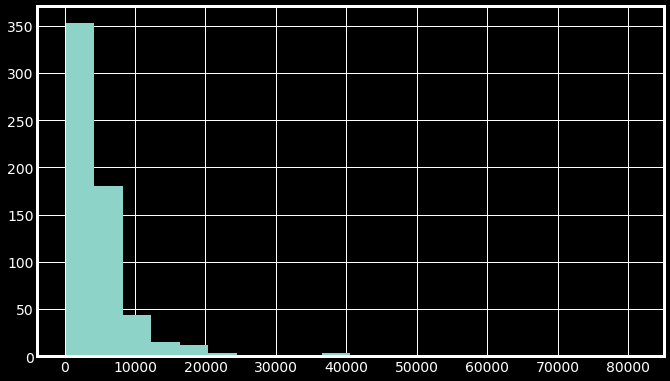

In [60]:
data['ApplicantIncome'].hist(bins=20)   

<AxesSubplot:>

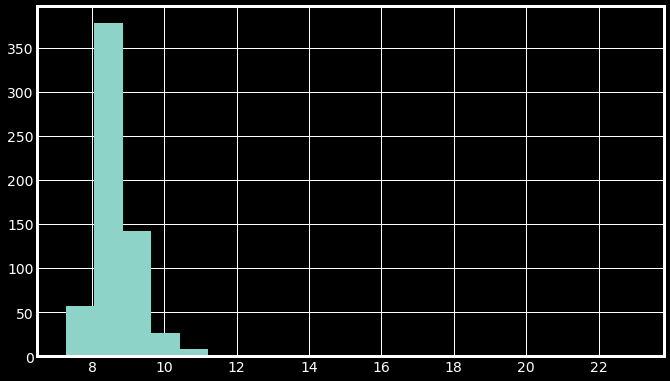

In [63]:
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data['TotalIncome_log'] = np.log(data['TotalIncome'])
data['TotalIncome_log'].hist(bins=20)


In [67]:
from sklearn.preprocessing import LabelEncoder

data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],
inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()
[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],
inplace=True)

var_mod =['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod: data[i] = le.fit_transform(data[i])
data.dtypes


RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf

ImportError: numpy.core.multiarray failed to import